In [88]:
import numpy as np
import pandas as pd
import pickle
import utils

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

### Importing the preprocessed data

In [89]:
attr = pd.read_pickle('data/attrition_preprocessed.pickle')

In [90]:
attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [91]:
attr.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

### Preparing data for modelling

In [92]:
X = attr.drop('Attrition', axis = 1)
y = np.where(attr.Attrition =='Yes', 1, 0)

In [93]:
X = pd.get_dummies(X, drop_first = True)

In [94]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [95]:
len(y)

1470

I'm dividing the dataset with 80/20 split because my dataset is relatively small.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### XGBoost

In [97]:
model = xgb.XGBClassifier(use_label_encoder=False,
                          eval_metric='logloss')

### Defining the parameters for GridSearch

I've tested several parameter grids and from what I've learned the model works best when converging to the values set in the dictionary.
- **n_estimators** - This parameter is rather volatile and tends to range from 300 to 600.
- **max_depth** - The model works best when building not too complex trees.
- **learning_rate** - This parameter has worked best when in the range of 0.4-0.7.
- **colsample_bytree** - The model tends to give better results when sampling the columns and leaving out only a small portion of them each time.

In [84]:
params = {'n_estimators' : [300, 400, 500, 600],
          'max_depth' : [1, 2, 3, 5],
          'learning_rate' : [0.7, 0.6, 0.5, 0.4],
          'colsample_bytree' : [0.7, 0.8, 0.9]}

I'm running crossvalidation with 4 folds so as to have a big enough test set and not too small training set.

In [85]:
print("My train dataset will consist of", int(len(y_train)/4*3), "observations.")
print("My test dataset will consist of", int(len(y_train)/4), "observations.")

My train dataset will consist of 882 observations.
My test dataset will consist of 294 observations.


I'm also using the 'f1' metric for scoring because of the fact that my *y* variable is imbalanced.

In [86]:
grid = GridSearchCV(estimator = model,
                    param_grid = params,
                    cv = 4,
                    scoring = 'f1'
                    )

In [87]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n..._jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
         

In [98]:
grid.cv_results_['params']

[{'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 1,
  'n_estimators': 300},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 1,
  'n_estimators': 400},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 1,
  'n_estimators': 500},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 1,
  'n_estimators': 600},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 2,
  'n_estimators': 300},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 2,
  'n_estimators': 400},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 2,
  'n_estimators': 500},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 2,
  'n_estimators': 600},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 3,
  'n_estimators': 300},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 3,
  'n_estimators': 400},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.7,
  'max_depth': 3,
 

In [99]:
grid.cv_results_['mean_test_score']

array([0.4974529 , 0.49040394, 0.47072913, 0.46747993, 0.46181491,
       0.46812002, 0.46526419, 0.4565143 , 0.45200358, 0.43665936,
       0.44797479, 0.44364922, 0.44711234, 0.43096422, 0.42671953,
       0.43063133, 0.48917303, 0.47212382, 0.48245844, 0.45137805,
       0.47568816, 0.47145726, 0.48790043, 0.47989828, 0.44266602,
       0.43879588, 0.4315861 , 0.43031638, 0.45076922, 0.45218234,
       0.45082733, 0.46277544, 0.48107843, 0.49139993, 0.48543124,
       0.46584302, 0.44630428, 0.46447815, 0.46156613, 0.45717377,
       0.41466269, 0.4257006 , 0.43256786, 0.43200748, 0.47422179,
       0.46745237, 0.4816247 , 0.47790385, 0.45610079, 0.48039417,
       0.47735817, 0.47925394, 0.44256538, 0.44808291, 0.4432422 ,
       0.45030673, 0.46394647, 0.46049518, 0.46464094, 0.47132226,
       0.45498965, 0.44928482, 0.45433296, 0.4529324 , 0.4793655 ,
       0.49079427, 0.48778504, 0.48567417, 0.45733291, 0.46216574,
       0.44997373, 0.46299571, 0.45368192, 0.44537164, 0.45326

In [100]:
grid.best_score_

0.49885096836316345

In [101]:
grid.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.6,
 'max_depth': 1,
 'n_estimators': 500}

In [102]:
pred = grid.predict_proba(X_test)

In [103]:
def choose_threshold_and_evaluate(model_pred, y_validation):
    
    precision, recall, thresholds = metrics.precision_recall_curve(y_validation, model_pred)
    f_score = 2 * precision * recall / (precision + recall)
    
    #Choosing the best threshold which maximizes F-score
    best_score = np.argmax(f_score)
    
    #making 0-1 predictions with the use of optimised threshold value
    class_pred = np.where(model_pred>thresholds[best_score], 1, 0)

    return thresholds[best_score], f_score[best_score], class_pred

In [104]:
xgboost_threshold, xgboost_f_score, xboost_class_pred = choose_threshold_and_evaluate(pred[:, 1], y_test)

In [105]:
xgboost_threshold, xgboost_f_score, xboost_class_pred 

(0.45872545,
 0.6268656716417911,
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

In [106]:
len(xboost_class_pred)

294

In [107]:
metrics.f1_score(y_test, xboost_class_pred)

0.6060606060606061

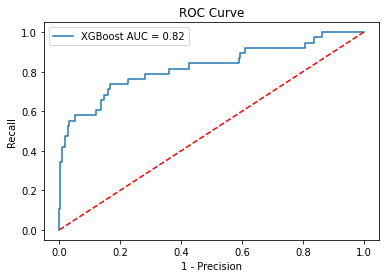

In [109]:
utils.plot_roc(y_test, pred[:, 1], model_name = 'XGBoost')

In this case XGBoost does not provide any improvement over logistic regression both in terms of F1 and AUC scores. Therefore I would recommend using more light-weight method, which is logistic regression. Possible reason of lack of improvement are:
- small dataset (not too much space for feature interactions)
- with relatively high proportion of features to observations.
- Imbalanced reponse which could be an obstacle for tree-based methods (only shallow trees have acceptable no of responses in the leaves)